# Generate cosine similarity between pairwise vectors of two lists

*Matthew Fecco*

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


def compute_cosine_similarity(sum_path, raw_path):
    
    model_df = pd.read_csv(sum_path)

    raw_df = pd.read_csv(raw_path)

    sum_vectors = model_df['EMBEDDING'].tolist()

    raw_vectors = raw_df['EMBEDDING'].tolist()


    # converts strings of arrays to np arrays
    sum_vectors_clean = [np.fromstring(vector.strip("[]"), dtype=float, sep=",") for vector in sum_vectors]
    raw_vectors_clean = [np.fromstring(vector.strip("[]"), dtype=float, sep=",") for vector in raw_vectors]

    # build 2d np array
    stacked_sum = np.stack(sum_vectors_clean)
    stacked_raw = np.stack(raw_vectors_clean)

    cosine_values =[]
    
    # calculate cosine similarty for pairwise sum and raw
    for sum, raw in zip(stacked_sum, stacked_raw):
        cosine_values.append(cosine_similarity(sum.reshape(1, -1), raw.reshape(1, -1)))

    # reshape arrays to 1D
    flat_values = [value.flatten() for value in cosine_values]
    final_values = np.concatenate(flat_values)

    return final_values

In [ ]:

raw = "Embeddings/raw_reports_embeddings.csv"

models = ["Bart", "Gemini", "Pegasus", "T5"]

In [42]:
results = {}

for model in models:
    file = "Embeddings/" + model + "_sum_embeddings-clean.csv"
    results[model] = compute_cosine_similarity(file, raw)

C:\Users\mfecc\AppData\Local\Temp\ipykernel_32612\1360193683.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


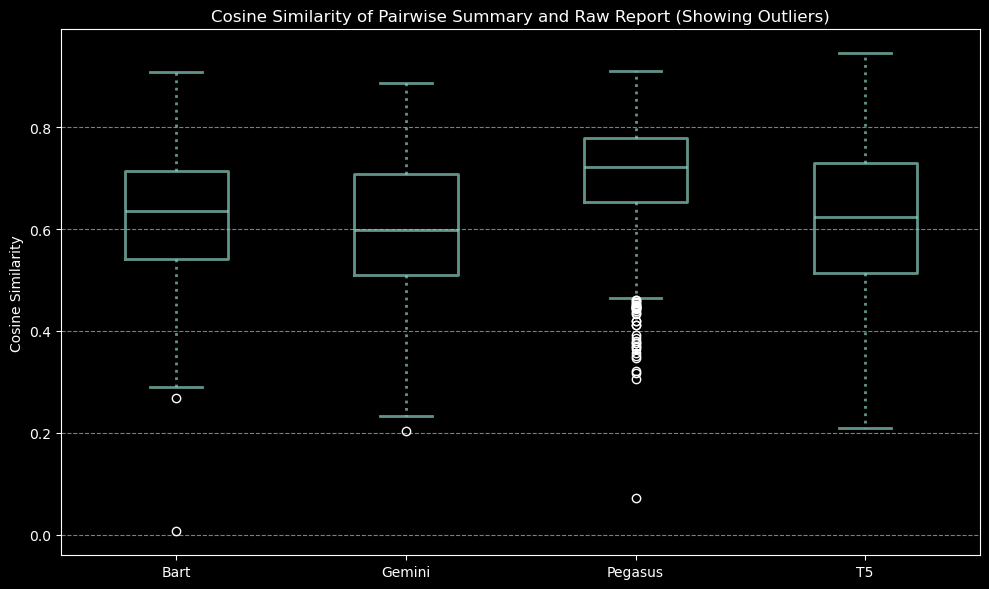

In [55]:
# pulled visualization from cosine_distances.ipynb
# By: Jack Skupien

import matplotlib.pyplot as plt
plt.style.use('dark_background')#dark mode

# def tukey(dists,outliers=True):
c="C0"          #color
a=0.7           #alpha val
linewidth=2     #linewidth
outliers=True  #show fliers
plt.figure(figsize=(10, 6))
plt.boxplot(
    list(results.values()),
    labels=list(results.keys()),
    vert=True,
    boxprops=dict(color=c,alpha=a,linewidth=linewidth),
    capprops=dict(color=c,alpha=a,linewidth=linewidth),
    whiskerprops=dict(color=c,alpha=a,linewidth=linewidth,linestyle=':'),
    medianprops=dict(color=c,alpha=a,linewidth=linewidth),
    showfliers=outliers)
plt.title("Cosine Similarity of Pairwise Summary and Raw Report (Showing Outliers)")
plt.ylabel("Cosine Similarity")
plt.grid(True, axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

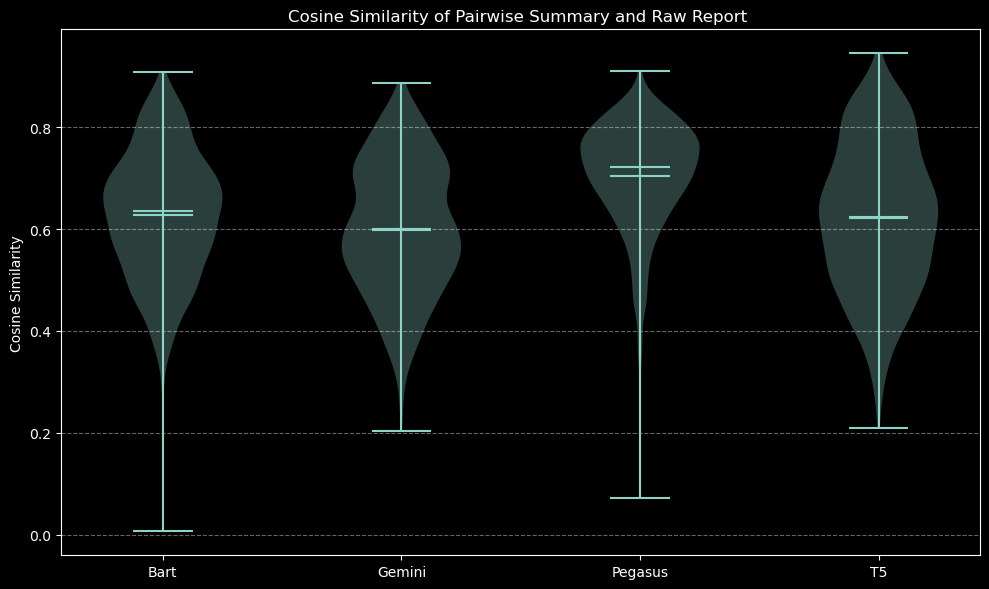

In [ ]:
# pulled visualization from cosine_distances.ipynb
# By: Jack Skupien

# def violin(dists):
plt.figure(figsize=(10, 6))
# '''violin_parts='''
plt.violinplot(
    list(results.values()),
    showmeans=True,        #show mean line
    showextrema=True,      #show min/max
    showmedians=True       #show median
    # color='lime'
)

# for pc in violin_parts['bodies']:
#     pc.set_facecolor('lime')
#     pc.set_edgecolor('lime')
# Set x-ticks and labels manually since violinplot doesn't do it automatically
plt.xticks(
    ticks=np.arange(1, len(results) + 1),
    labels=list(results.keys())
)

plt.title("Cosine Similarity of Pairwise Summary and Raw Report ")
plt.ylabel("Cosine Similarity")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()